In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"  
os.environ["CUDA_VISIBLE_DEVICES"]="6"


In [2]:

import numpy as np
from matplotlib import pyplot as plt
import nibabel as nib
from PIL import Image
from matplotlib import pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split


In [3]:
#이미지 불러오기
data_path='/disk1/data_liverbound_noclip/'
name_list=os.listdir(data_path)
segmentation_data = [files[:-4] for files in name_list if files.startswith('segmentation')]
segmentation_data=list(set(segmentation_data))
segmentation_data.sort()
volume_data=[files[:-4] for files in name_list if files.startswith('volume')]
volume_data=list(set(volume_data))
volume_data.sort()
print(segmentation_data)
#print(volume_data)

save_png_path='/home/sumins/workspace/example/save_png/'
save_volume_path='/home/sumins/workspace/example/save_png/vol_png/'

['segmentation-0', 'segmentation-1', 'segmentation-10', 'segmentation-100', 'segmentation-101', 'segmentation-102', 'segmentation-103', 'segmentation-104', 'segmentation-105', 'segmentation-106', 'segmentation-107', 'segmentation-108', 'segmentation-109', 'segmentation-11', 'segmentation-110', 'segmentation-111', 'segmentation-112', 'segmentation-113', 'segmentation-114', 'segmentation-115', 'segmentation-116', 'segmentation-117', 'segmentation-118', 'segmentation-119', 'segmentation-12', 'segmentation-120', 'segmentation-121', 'segmentation-122', 'segmentation-123', 'segmentation-124', 'segmentation-125', 'segmentation-126', 'segmentation-127', 'segmentation-128', 'segmentation-129', 'segmentation-13', 'segmentation-14', 'segmentation-15', 'segmentation-16', 'segmentation-17', 'segmentation-18', 'segmentation-19', 'segmentation-2', 'segmentation-20', 'segmentation-21', 'segmentation-22', 'segmentation-23', 'segmentation-24', 'segmentation-25', 'segmentation-26', 'segmentation-27', 'se

In [4]:
segmentation_list=[]
for file in segmentation_data:
    fname=os.path.basename(file)
    print(fname)
    img_array=np.load(data_path+fname+'.npy')
    
    #print(f'img_num: {img_array.shape}')
    
    if len(img_array.shape) == 3:
        nx, ny, nz = img_array.shape
        total_slices = img_array.shape[2]
        print(total_slices)
        # iterate through slices
        for current_slice in range(0, total_slices):
            segmentation_list.append(img_array[:,:,current_slice]) 
#간 1, 병변 2, 나머지 0



segmentation-0
29
segmentation-1
32
segmentation-10
216
segmentation-100
322
segmentation-101
308
segmentation-102
374
segmentation-103
255
segmentation-104
231
segmentation-105
284
segmentation-106
199
segmentation-107
295
segmentation-108
244
segmentation-109
231
segmentation-11
198
segmentation-110
224
segmentation-111
278
segmentation-112
228
segmentation-113
201
segmentation-114
256
segmentation-115
221
segmentation-116
260
segmentation-117
309
segmentation-118
145
segmentation-119
157
segmentation-12
205
segmentation-120
141
segmentation-121
134
segmentation-122
139
segmentation-123
136
segmentation-124
133
segmentation-125
133
segmentation-126
134
segmentation-127
270
segmentation-128
349
segmentation-129
325
segmentation-13
169
segmentation-14
164
segmentation-15
158
segmentation-16
222
segmentation-17
235
segmentation-18
224
segmentation-19
223
segmentation-2
164
segmentation-20
231
segmentation-21
191
segmentation-22
53
segmentation-23
137
segmentation-24
139
segmentation-25


In [5]:
volume_list=[]
for file in volume_data:
    fname=os.path.basename(file)
    print(fname)
    img_array=np.load(data_path+fname+'.npy')
    
    #print(f'img_num: {img_array.shape}')
    
    if len(img_array.shape) == 3:
        nx, ny, nz = img_array.shape
        total_slices = img_array.shape[2]
        # iterate through slices
        for current_slice in range(0, total_slices):
            volume_list.append(img_array[:,:,current_slice]) 

volume-0
volume-1
volume-10
volume-100
volume-101
volume-102
volume-103
volume-104
volume-105
volume-106
volume-107
volume-108
volume-109
volume-11
volume-110
volume-111
volume-112
volume-113
volume-114
volume-115
volume-116
volume-117
volume-118
volume-119
volume-12
volume-120
volume-121
volume-122
volume-123
volume-124
volume-125
volume-126
volume-127
volume-128
volume-129
volume-13
volume-14
volume-15
volume-16
volume-17
volume-18
volume-19
volume-2
volume-20
volume-21
volume-22
volume-23
volume-24
volume-25
volume-26
volume-27
volume-28
volume-29
volume-3
volume-30
volume-31
volume-32
volume-33
volume-34
volume-35
volume-36
volume-37
volume-38
volume-39
volume-4
volume-40
volume-41
volume-42
volume-43
volume-44
volume-45
volume-46
volume-47
volume-48
volume-49
volume-5
volume-50
volume-51
volume-52
volume-53
volume-54
volume-55
volume-56
volume-57
volume-58
volume-59
volume-6
volume-60
volume-61
volume-62
volume-63
volume-64
volume-65
volume-66
volume-67
volume-68
volume-69
volume-

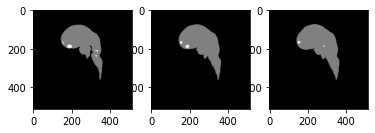

In [13]:
fig=plt.figure()
rows=1
cols=3
for i in range(15,18):
    k=fig.add_subplot(rows,cols,i-14)
    k.imshow(segmentation_list[i],cmap='gray')

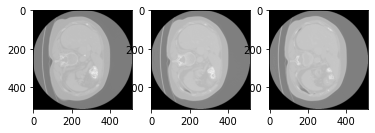

In [14]:
fig=plt.figure()
rows=1
cols=3
for i in range(15,18):
    k=fig.add_subplot(rows,cols,i-14)
    k.imshow(volume_list[i],cmap='gray')

In [6]:
all_labels = []
for i in segmentation_list:
    if 2 in i:
        all_labels.append(1)
    else:
        all_labels.append(0)


In [ ]:
all_labels

In [26]:
class CustomDataset(Dataset): 

  def __init__(self,volume_list,all_labels):
    self.volume_list=volume_list
    self.all_labels=all_labels
    self.length=len(all_labels)

  def __len__(self):
    return self.length

  def __getitem__(self, idx): 
    
    return{'npy':torch.tensor(volume_list[idx],dtype=torch.float32),'label':self.all_labels[idx]}

In [42]:
from torch import nn
class CNN(nn.Module):
    def __init__(self):
    	# super함수는 CNN class의 부모 class인 nn.Module을 초기화
        super(CNN, self).__init__()
        
        # batch_size = 1
        self.layer = nn.Sequential(
            # [1,1,512,512] -> [1,16,508,508]
            nn.Conv2d(in_channels=1,out_channels=16,kernel_size=5),
            nn.ReLU(),
            
            # [1,16,508,508] -> [1,32,504,504]
            nn.Conv2d(in_channels=16,out_channels=32,kernel_size=5),
            nn.ReLU(),
            
            # [1,32,504,504] -> [1,32,10,252,252]
            nn.MaxPool2d(kernel_size=2,stride=2),
            
            # [1,32,252,252] -> [1,64,248,248]
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=5),
            nn.ReLU(),
            
            # [1,64,248,248] -> [1,64,124,124]
            nn.MaxPool2d(kernel_size=2,stride=2), 

            # [1,64,124,124] -> [1,128,120,120]
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5),
            nn.ReLU(),
            # [1,128,120,120] -> [1,128,60,60]
            nn.MaxPool2d(kernel_size=2,stride=2),    
            # [1,128,60,60] -> [1,256,56,56]
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=5),
            nn.ReLU(),
            # [1,256,56,56] -> [1,256,28,28]
            nn.MaxPool2d(kernel_size=2,stride=2)         
        )
        self.fc_layer = nn.Sequential(
        	# [100,64*3*3] -> [100,100]
            nn.Linear(256*28*28,100),                                              
            nn.ReLU(),
            # [100,100] -> [100,10]
            nn.Linear(100,2)                                                   
        )       
        
    def forward(self,x):
    	# self.layer에 정의한 연산 수행
        out = self.layer(x)
        # view 함수를 이용해 텐서의 형태를 [100,나머지]로 변환
        out = out.view(hyper_param_batch,-1)
        # self.fc_layer 정의한 연산 수행    
        out = self.fc_layer(out)
        return out

In [43]:
vol_train, vol_valid, lab_train, lab_valid = train_test_split(volume_list, all_labels, test_size=0.2, shuffle=True, stratify=all_labels, random_state=34)


In [44]:
train_dataset=CustomDataset(volume_list=vol_train, all_labels=lab_train)
test_dataset=CustomDataset(volume_list=vol_valid,all_labels=lab_valid)

In [45]:
hyper_param_epoch=5
hyper_param_batch=1
hyper_param_learning_rate=0.00001

In [46]:
train_loader = DataLoader(train_dataset, batch_size=hyper_param_batch, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=hyper_param_batch, shuffle=True)


In [49]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
custom_model=CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(custom_model.parameters(), lr=hyper_param_learning_rate)

In [50]:
import time
start=time.time()
for e in range(hyper_param_epoch):
    for i_batch, item in enumerate(train_loader):
        npys = item['npy'].to(device)
        labels = item['label'].to(device)
        npys=npys.unsqueeze(1)

        # Forward pass
        outputs = custom_model(npys)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i_batch + 1) % 1000 == 0:
            print('Epoch [{}/{}],i_batch={} Loss: {:.4f}'
                  .format(e + 1, hyper_param_epoch, i_batch+1, loss.item()))
            print("Time: {}sec".format(time.time()-start))
            start=time.time()

Epoch [1/5],i_batch=1000 Loss: 0.4852
Time: 74.60332751274109sec
Epoch [1/5],i_batch=2000 Loss: 0.3757
Time: 75.06589579582214sec
Epoch [1/5],i_batch=3000 Loss: 0.9218
Time: 74.30494093894958sec
Epoch [1/5],i_batch=4000 Loss: 0.4494
Time: 74.27832317352295sec
Epoch [1/5],i_batch=5000 Loss: 0.4768
Time: 74.02013421058655sec
Epoch [1/5],i_batch=6000 Loss: 0.3687
Time: 74.02398562431335sec
Epoch [1/5],i_batch=7000 Loss: 0.3901
Time: 73.18379950523376sec
Epoch [1/5],i_batch=8000 Loss: 0.8550
Time: 73.36230373382568sec
Epoch [1/5],i_batch=9000 Loss: 0.3673
Time: 74.68136358261108sec
Epoch [1/5],i_batch=10000 Loss: 0.4984
Time: 73.29740953445435sec
Epoch [1/5],i_batch=11000 Loss: 0.5038
Time: 74.45130181312561sec
Epoch [1/5],i_batch=12000 Loss: 0.9891
Time: 73.94732356071472sec
Epoch [1/5],i_batch=13000 Loss: 1.2989
Time: 74.31383895874023sec
Epoch [1/5],i_batch=14000 Loss: 1.0519
Time: 75.56456446647644sec
Epoch [1/5],i_batch=15000 Loss: 1.0318
Time: 73.70075964927673sec
Epoch [1/5],i_batch

In [57]:
# Test the model
custom_model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for item in test_loader:
        npys = item['npy'].to(device)
        labels = item['label'].to(device)
        
        npys=npys.unsqueeze(1)
        #npys=torch.tensor(npys,dtype=torch.float32)
        
        outputs = custom_model(npys)
        #print(outputs.data)
        _, predicted = torch.max(outputs.data, 1)
        #print('predicted: ',predicted)
        print(predicted)
        total += len(labels)
        correct += (predicted == labels).sum().item()
        

    print('Test Accuracy of the model on the {} test images: {} %'.format(total, 100 * correct / total))

tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], device='cuda:0')
tensor([0], de

tensor([0], device='cuda:0')
